In [1]:
from pyts.datasets import load_gunpoint
from pyts.image import MarkovTransitionField
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("../data/bitmex_1m_2016-2020.csv")
df.dropna(inplace=True)
df['pct'] = df.bidPrice.pct_change()
df['pctSum'] = df.pct.cumsum()
df.dropna(inplace=True)
df = df.drop(['bidPrice', 'pct', 'symbol', 'timestamp', 'bidSize', 'askPrice', 'askSize'], axis=1)
df.describe()

,pctSum
count,2623501.000
mean,3.130
std,1.754
min,-0.196
25%,1.279
50%,3.895
75%,4.503
max,6.019


In [3]:
data = df.iloc[:200]
data.shape

(200, 1)

In [4]:
data.head()

,pctSum
1,-0.000
2,-0.000
3,0.000
4,0.000
5,0.000


In [5]:
d = data.values
d.shape

(200, 1)

In [6]:
def cnn_transform(df, window=100): #df = np.arr
    new_rows = []
    for row in range(df.shape[0]):
        if row + window <= df.shape[0]:
            subset = df[row:row+window]
            tmp = []
            for v in range(df.shape[1]):
                tmp.append(subset[:, v])
            new_rows.append(tmp)
    return np.asarray(new_rows)
        

In [7]:
l = cnn_transform(d)

In [8]:
l.shape

(101, 1, 100)

(101, 100, 100)


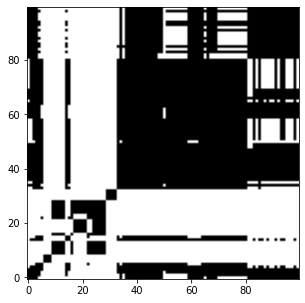

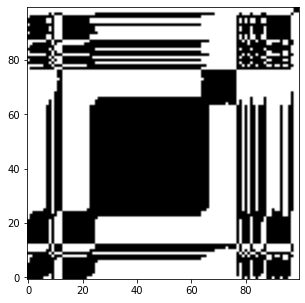

In [9]:
from pyts.multivariate.image import JointRecurrencePlot
import matplotlib.pyplot as plt

# Recurrence plot transformation
jrp = JointRecurrencePlot(threshold='point', percentage=50)
X_jrp = jrp.fit_transform(l)
print(X_jrp.shape)
# Show the results for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_jrp[0], cmap='binary', origin='lower')
plt.show()
plt.figure(figsize=(5, 5))
plt.imshow(X_jrp[-1], cmap='binary', origin='lower')
plt.show()

In [10]:
from gym import spaces
space = spaces.Box(low=-1, high=1, shape=(2, 2), dtype=np.float64)
print(space.sample())

[[-0.79030087 -0.42576864]
 [-0.3517423   0.77323166]]


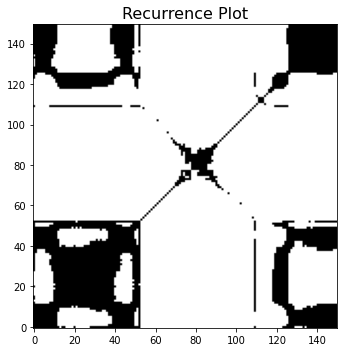

In [11]:
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint

X, _, _, _ = load_gunpoint(return_X_y=True)

# Recurrence plot transformation
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)

# Show the results for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_rp[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot', fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
X.shape

(50, 150)

In [13]:
def window_transform(df, window=150): #df = np.arr
    new_rows = []
    for row in range(df.shape[0]):
        if row + window <= df.shape[0]:
            new_rows.append(df[row:row+window])
    n = np.asarray(new_rows)
    return np.squeeze(n)

In [14]:
m = window_transform(d)
m.shape

(51, 150)

In [15]:
m

array([[-0.00006976, -0.0000465 ,  0.        , ...,  0.00016832,
         0.00016832,  0.00016832],
       [-0.0000465 ,  0.        ,  0.00013952, ...,  0.00016832,
         0.00016832,  0.00016832],
       [ 0.        ,  0.00013952,  0.00020927, ...,  0.00016832,
         0.00016832,  0.00016832],
       ...,
       [ 0.00019136,  0.00019136,  0.00028435, ..., -0.00006404,
         0.00005223,  0.000215  ],
       [ 0.00019136,  0.00028435,  0.00023786, ...,  0.00005223,
         0.000215  ,  0.00056372],
       [ 0.00028435,  0.00023786,  0.00023786, ...,  0.000215  ,
         0.00056372,  0.00063344]])

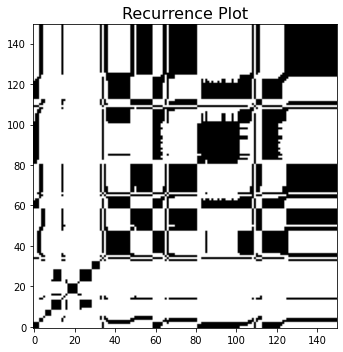

In [19]:
rp = RecurrencePlot(threshold='point', percentage=30)
X_rp = rp.fit_transform(m)

# Show the results for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_rp[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot', fontsize=16)
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
np.absolute(70-60)

10